<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/Fall2025/Week07/Pytorch_Regression_California_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Applying Neural Networks for Regression on the California Housing Prices Dataset

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
housing = fetch_california_housing(as_frame=True)
X, y = housing.data, housing.target

X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [2]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


<Axes: >

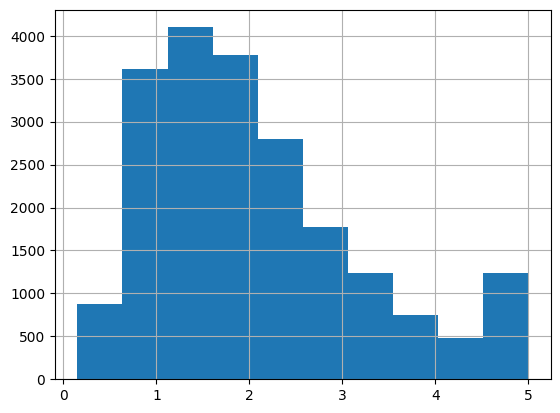

In [3]:
y.hist()

In [4]:
X.isnull().sum() #check if there are any missing values

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


In [5]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features (important for many ML algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape, "Test shape:", X_test_scaled.shape)


Train shape: (16512, 8) Test shape: (4128, 8)


In [6]:
# Correlation matrix
df = housing.frame

corr_matrix = df.corr(numeric_only=True)
corr_matrix
# Why do we look at correlations?
# - Predictor ↔ Target: for exploration. Helps us see which features
#   are strongly related to the outcome, but remember these are NOT
#   the regression coefficients (they don’t control for other features).
# - Predictor ↔ Predictor: for diagnostics. High correlations here
#   signal multicollinearity, which can make regression coefficients
#   unstable or misleading.
# In short: correlations give intuition (with target) and caution (among features),
# but the final story comes from fitting and validating the model.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [7]:
corr_matrix.columns #These are the columns of the correlation matrix

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [8]:
corr_matrix.index #These are the rows of the correlation matrix

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [9]:
# Correlations with target (Median House Value)
target_corrs = df.corr(numeric_only=True)["MedHouseVal"]
print("Correlations with target:\n", target_corrs)


Correlations with target:
 MedInc         0.688075
HouseAge       0.105623
AveRooms       0.151948
AveBedrms     -0.046701
Population    -0.024650
AveOccup      -0.023737
Latitude      -0.144160
Longitude     -0.045967
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64


In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fit NN regressor
# model = KNeighborsRegressor(n_neighbors=5)

# or LinearRegression
model = LinearRegression()


In [11]:
model.fit(X_train_scaled, y_train)

# Test error (generalization)
y_pred = model.predict(X_test_scaled)
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R2 :", r2_score(y_test, y_pred))


Test MSE: 0.5558915986952442
Test R2 : 0.575787706032451


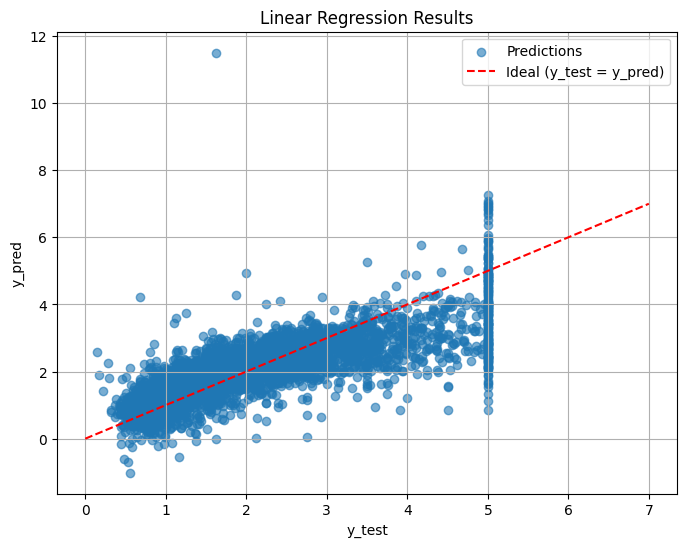

In [12]:
# Plot results
import matplotlib.pyplot as plt

def plot_results(y_test, y_pred, title = "Regression Results"):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, label="Predictions")

    # Ideal line (y_test = y_pred)
    plt.plot([0, 7], [0, 7], color="red", linestyle="--", label="Ideal (y_test = y_pred)")

    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_results(y_test, y_pred, "Linear Regression Results")


In [13]:
# Let's try a neural network instead of linear regression
# We can add layers and transform the data into nonlinear combinations of the predictors
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1) #you can use reshape, too
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1) #instead of reshape, view can be used too.

model = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 500
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0 or epoch == n_epochs - 1:
        print(f"Epoch {epoch+1}/{n_epochs}, Train MSE: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()

print("\nFinal evaluation:")
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R2 :", r2_score(y_test, y_pred))


Epoch 1/500, Train MSE: 6.1273
Epoch 11/500, Train MSE: 4.7312
Epoch 21/500, Train MSE: 3.3800
Epoch 31/500, Train MSE: 2.2397
Epoch 41/500, Train MSE: 1.5514
Epoch 51/500, Train MSE: 1.1245
Epoch 61/500, Train MSE: 0.8983
Epoch 71/500, Train MSE: 0.8006
Epoch 81/500, Train MSE: 0.7442
Epoch 91/500, Train MSE: 0.6978
Epoch 101/500, Train MSE: 0.6568
Epoch 111/500, Train MSE: 0.6218
Epoch 121/500, Train MSE: 0.5907
Epoch 131/500, Train MSE: 0.5628
Epoch 141/500, Train MSE: 0.5381
Epoch 151/500, Train MSE: 0.5162
Epoch 161/500, Train MSE: 0.4972
Epoch 171/500, Train MSE: 0.4811
Epoch 181/500, Train MSE: 0.4674
Epoch 191/500, Train MSE: 0.4559
Epoch 201/500, Train MSE: 0.4463
Epoch 211/500, Train MSE: 0.4382
Epoch 221/500, Train MSE: 0.4312
Epoch 231/500, Train MSE: 0.4250
Epoch 241/500, Train MSE: 0.4195
Epoch 251/500, Train MSE: 0.4145
Epoch 261/500, Train MSE: 0.4100
Epoch 271/500, Train MSE: 0.4059
Epoch 281/500, Train MSE: 0.4021
Epoch 291/500, Train MSE: 0.3986
Epoch 301/500, Train 

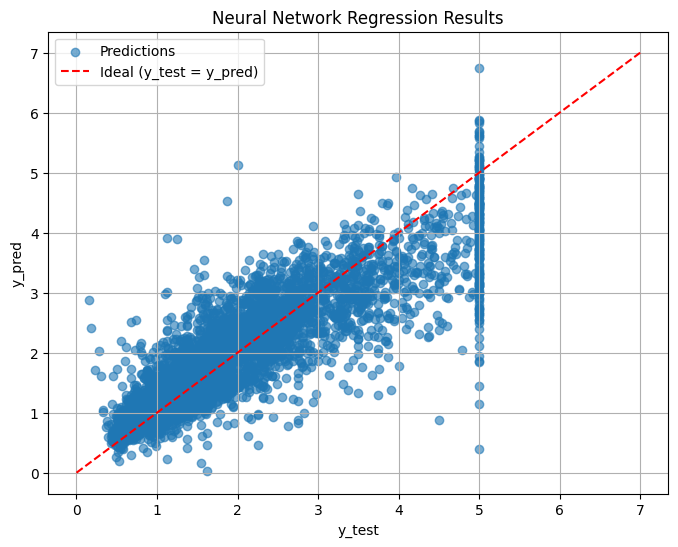

In [14]:
# Plot results
plot_results(y_test, y_pred, "Neural Network Regression Results")
